In [ ]:
'''   
Try a different renderer which can work with GLB. This
NOt easy to use + there will be a big effort if we change renderer now
'''

In [1]:
import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'

In [218]:
import trimesh
import pyrender
from PIL import Image

from pyrender import PerspectiveCamera,\
                     DirectionalLight, SpotLight, PointLight,\
                     MetallicRoughnessMaterial,\
                     Primitive, Mesh, Node, Scene,\
                     Viewer, OffscreenRenderer, RenderFlags


from pytorch3d.io import load_obj, load_ply
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    TexturesAtlas,
    Textures,
    PointsRenderer,
    PointsRasterizationSettings,
    PointsRasterizer
)

from pyrender import Mesh


from pytorch3d.io import IO
from pytorch3d.io.experimental_gltf_io import MeshGlbFormat


from pytorch3d.structures import Meshes

import sys
sys.path.append("../")
from rendererClass import RendererClass

import matplotlib.pyplot as plt
import json
import itertools
import torch
import numpy as np

param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:0"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))




In [4]:
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"
path_bed = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.gltf"
part_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/kitchen.glb"
path_astronaut = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Astronaut/Astronaut.glb"
police_obj = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Office_chair/10239_Office_Chair_v1_L3.obj"
bottle = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/bottle/WaterBottle.glb"





In [114]:
bottle_gltf = trimesh.load(path_astronaut)


In [115]:
#mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)

#for scene
#mesh = pyrender.Mesh.from_trimesh((list(fuze_trimesh.geometry.values())[0]))

bottle_trimesh = bottle_gltf.geometry[list(bottle_gltf.geometry.keys())[0]]


bottle_trimesh.vertices.max()


TrackedArray(2.01084709)

In [116]:
bottle_trimesh.apply_scale(1/10)

<trimesh.Trimesh(vertices.shape=(4812, 3), faces.shape=(1604, 3))>

In [118]:


bottle_mesh = Mesh.from_trimesh(bottle_trimesh)

In [119]:
bottle_pose = np.array([
    [1.0, 0.0,  0.0, 0.1],
    [0.0, 0.0, -1.0, -0.16],
    [0.0, 1.0,  0.0, 0.13],
    [0.0, 0.0,  0.0, 1.0],
])

In [120]:
direc_l = DirectionalLight(color=np.ones(3), intensity=1.0)
spot_l = SpotLight(color=np.ones(3), intensity=10.0,
                   innerConeAngle=np.pi/16, outerConeAngle=np.pi/6)
point_l = PointLight(color=np.ones(3), intensity=10.0)

In [151]:


s = np.sqrt(2)/2

cam = PerspectiveCamera(yfov=(np.pi / 3.0))
cam_pose = np.array([
    [0.0,  -s, s, 0.5],
    [1.0, 0.0,           0.0,           0.0],
    [0.0,  s,  s, 0.4],
    [0.0,  0.0,           0.0,          1.0]
])


In [152]:

scene = Scene(ambient_light=np.array([0.02, 0.02, 0.02, 1.0]))


In [153]:
bottle_node = scene.add(bottle_mesh, pose=bottle_pose)

In [155]:
direc_l_node = scene.add(direc_l, pose=cam_pose)
spot_l_node = scene.add(spot_l, pose=cam_pose)

cam_node = scene.add(cam, pose=cam_pose)
r = OffscreenRenderer(viewport_width=640*2, viewport_height=480*2)
color, depth = r.render(scene)
r.delete()

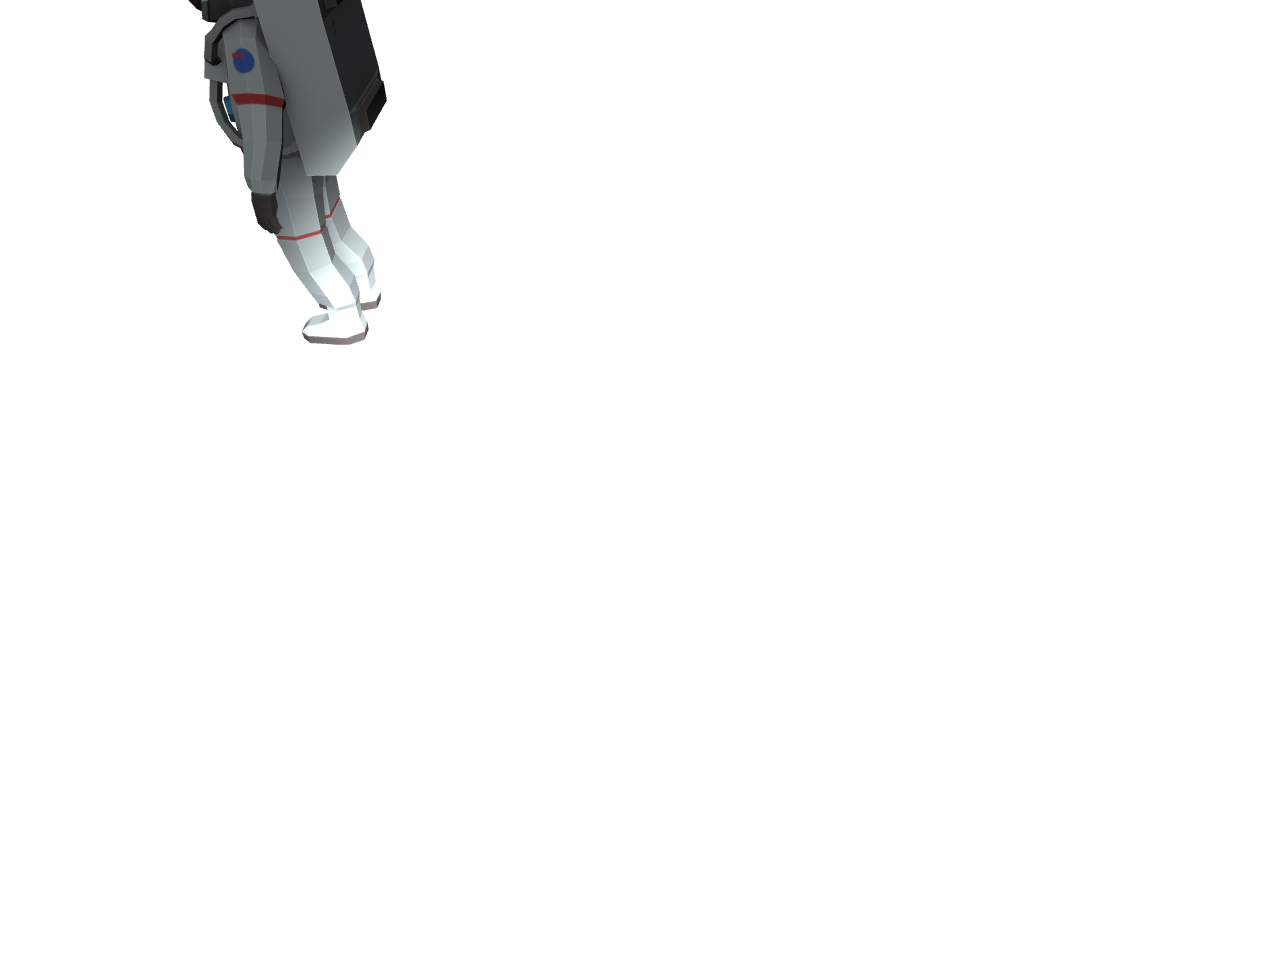

In [156]:
image = Image.fromarray(color, 'RGB')
image.show()

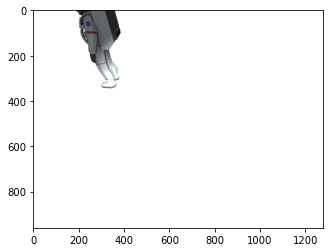

In [164]:
plt.imshow(color)
plt.show()